# 이미지 처리 기초

이미지는 행렬(matrix)로 표현할 수 있다.
    - 행과 열은 각각 가로와 세로를 의미한다.
    - 색상 정보, 장수, 시간 따위의 개념을 추가할 경우 3차원이 되기도 한다.
    - 즉, **numpy로 이미지를 처리할 수 있다.**

Computer Vision에서 색을 표현하는 방법
    - RGB
        - 가장 많이 쓰는 방법
        - 빛의 속성이다. 값이 낮으면 검은색이다.
        - Red, Green, Blue를 빛의 색조합하여 표현한다.
        - Red, Green, Blue가 모두 높으면 흰색이 된다.
        - 0~255 사이의 값을 가진다.
    - CMYK 등...
        - 아직 이미지 처리 연구가 많이 되지 않음.

2차원
    - (height, width)
    - 흑백 이미지
    - 색은 없고 강도만 존재한다.

3차원
    - (height, width, channel 수)
        - channel last 표현 방식
        - 텐서플로우는 channel last 방식
    - (channel 수, height, width)
        - channel first 표현 방식
        - 예전 논문은 channel first 방식이 많다.
    - channel 수가 3이면 RGB 컬러 이미지
    - channel 수가 1이면 흑백 이미지
    - channel 수가 4이면 투명도를 포함한 컬러 이미지
    
4차원  
    - (이미지 개수, height, width, channel 수)
    - (10, 240, 360, 3)
    - 동영상은 단일이미지의 연속이므로 동영상은 4차원으로 표현할 수 있다.

In [1]:
from tensorflow.keras.datasets import mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

> x_train에는 height 28, width 28인 흑백이미지가 60000장이 들어있다.

In [13]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

> 이미지는 numpy로 되어있다.

In [14]:
import matplotlib.pyplot as plt

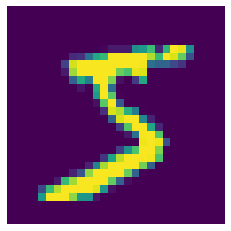

In [29]:
plt.imshow(x_train[0])
plt.axis(False)
plt.show()

> - numpy로 된 이미지를 보기 위해서는 다른 라이브러리를 빌려야한다.
- 가장 많이 사용하는 것은 `plt.imshow`
    - `im`이 붙으면 image를 처리하는 함수이다.
- 흑백 이미지인데 컬러로 나오는 이유?
    - 흑백이미지를 자동으로 컬러로 변환해서 보여주는 것이 기본값이다.
    - `cmap` 옵션으로 색상 스타일을 조정할 수 있다.

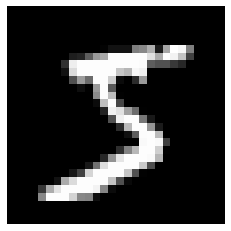

In [30]:
plt.imshow(x_train[0], cmap="gray")
plt.axis(False)
plt.show()

> 흑백으로 표현하기

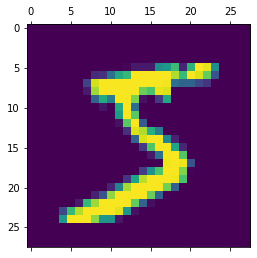

In [28]:
plt.matshow(x_train[0])
plt.show()

> `plt.matshow`은 matrix 전용 시각화 기능이다.

In [32]:
import numpy as np
np.matrix([[1,2,3],[4,5,6]])

matrix([[1, 2, 3],
        [4, 5, 6]])

> - `np.matrix`는 `array`와 비슷하지만 보다 행렬스러운 객체이다.
    - `array`에서 \*는 element 곱이지만 `matrix`에서는 행렬 곱이다.
    - 선형대수 연산을 위해서 특별히 고안된 객체이다.

# numpy는 CV에서 전처리하는데 사용합니다.